# Using Letters and digits to model

Based on MNIST dataset, I'll use another dataset that uses letters and numbers to train a model and make a prediction.

Link to dataset => https://www.kaggle.com/datasets/swarupshah/digit-character?select=digit_char_dataset.csv

So, open the link, download and extract the dataset to see more details below at training.

PS: The zip file is 200MB. Github doesn't support that size. That's why I can't provide It at this folder.

# 1. Collecting and treating the data

Unziping the data inside archive.zip

In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models,utils


In [8]:
#Creating dataset based on the initial CSV

df = pd.read_csv('./digits_letters/digit_char_dataset.csv')

In [9]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


Seeing images

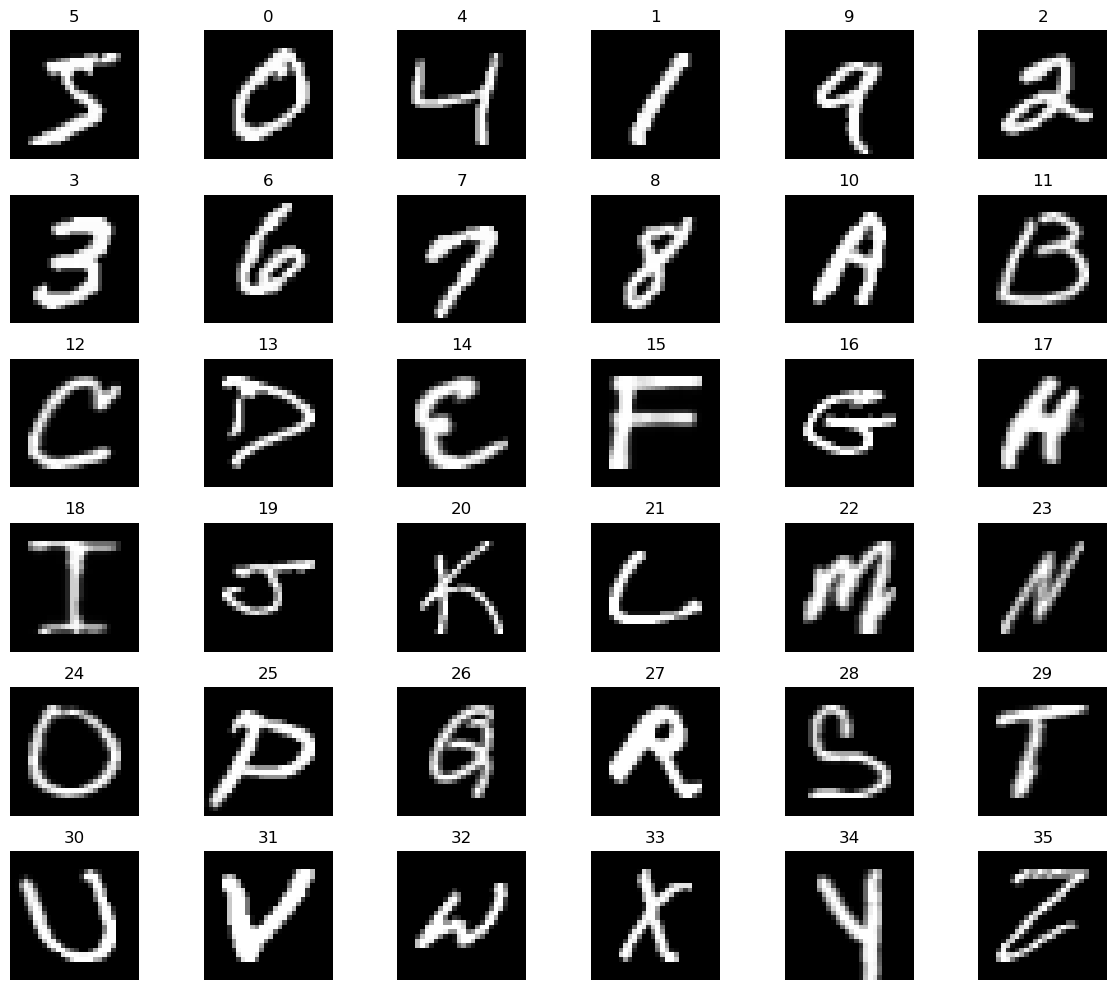

In [10]:
plt.figure(figsize=(12,10))

dataset_without_duplicates = df.drop_duplicates(subset='class')

for i in range(36):
    plt.subplot(6,6,i + 1)
    img = np.array(dataset_without_duplicates.iloc[i,:-1]).reshape(28, 28)
    plt.title(dataset_without_duplicates.iloc[i,-1])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  
plt.tight_layout()
plt.show()


# 2. Model creation

## 2.1 Data pre-processing and visualization

In [11]:
import tensorflow as tf

x = df.iloc[:,:-1].values.astype('float32')
y = df['class'].values

In [12]:
x = x/255.00 #Normalization

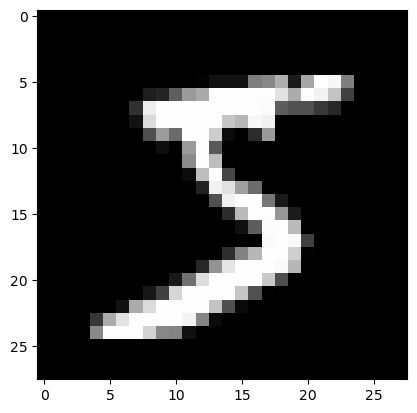

In [13]:
#Seeing one image 
plt.imshow(x[0].reshape(28,28),cmap='gray')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
import keras

CLASSES = len(np.unique(y))
IMG_SIZE_RESHAPE = 28

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=42,stratify=y)
x_train = x_train.reshape(-1,IMG_SIZE_RESHAPE,IMG_SIZE_RESHAPE,1)
x_test = x_test.reshape(-1,IMG_SIZE_RESHAPE,IMG_SIZE_RESHAPE,1)



y_train = keras.utils.to_categorical(y_train,CLASSES)
y_test = keras.utils.to_categorical(y_test, CLASSES)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (265470, 28, 28, 1)
y_train shape: (265470, 36)


In [15]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (146009, 28, 28, 1)
y_test shape: (146009, 36)


## 2.2 Model Creation

In [35]:
from tensorflow.keras import layers, models,utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator


INPUT_IMG_SHAPE = (28,28,1)
CLASSES = len(np.unique(y))


model = models.Sequential([
    layers.Input(shape=INPUT_IMG_SHAPE),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64,activation='relu'),
   
    layers.Dense(CLASSES,activation='softmax')

])


In [36]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 1, 1, 128)        

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    './saved_model/checkpoint_model.h5',
    monitor='val_loss',
    save_best_only= True,
    save_weights_only=False,
    mode='min',
    verbose=0,
)
# Training data
hist = model.fit(x_train, y_train, batch_size=128,epochs=10, validation_data=(x_test, y_test),verbose=1,shuffle=True,callbacks=[checkpoint])

Epoch 1/10
2074/2074 [==============================] - 120s 57ms/step - loss: 0.7989 - accuracy: 0.7705 - val_loss: 0.2398 - val_accuracy: 0.9281
Epoch 2/10
   2/2074 [..............................] - ETA: 2:07 - loss: 0.4172 - accuracy: 0.8828

c:\Users\gears\anaconda3\envs\ml\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2074/2074 [==============================] - 121s 58ms/step - loss: 0.3671 - accuracy: 0.8933 - val_loss: 0.1782 - val_accuracy: 0.9460
Epoch 3/10
2074/2074 [==============================] - 122s 59ms/step - loss: 0.2959 - accuracy: 0.9146 - val_loss: 0.1604 - val_accuracy: 0.9554
Epoch 4/10
2074/2074 [==============================] - 124s 60ms/step - loss: 0.2612 - accuracy: 0.9245 - val_loss: 0.1476 - val_accuracy: 0.9568
Epoch 5/10
2074/2074 [==============================] - 120s 58ms/step - loss: 0.2343 - accuracy: 0.9317 - val_loss: 0.1326 - val_accuracy: 0.9610
Epoch 6/10
2074/2074 [==============================] - 123s 59ms/step - loss: 0.2204 - accuracy: 0.9362 - val_loss: 0.1315 - val_accuracy: 0.9605
Epoch 7/10
2074/2074 [==============================] - 120s 58ms/step - loss: 0.2055 - accuracy: 0.9404 - val_loss: 0.1214 - val_accuracy: 0.9650
Epoch 8/10
2074/2074 [==============================] - 121s 58ms/step - loss: 0.1966 - accuracy: 0.9429 - val_loss: 0.1190 - val

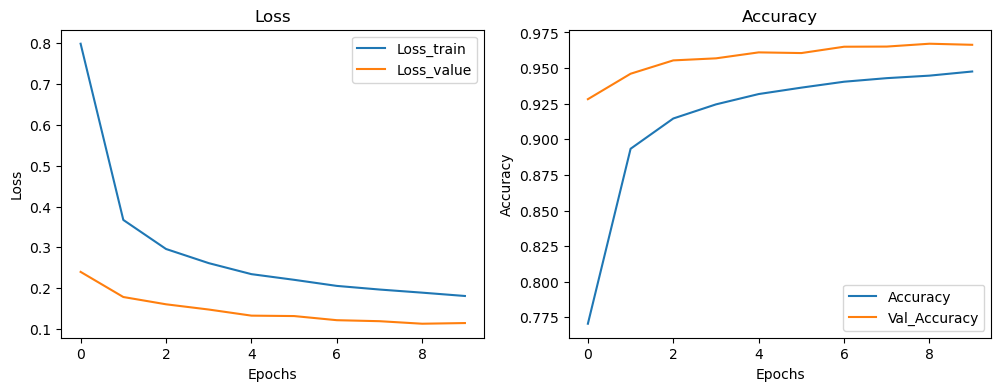

In [39]:
plt.figure(figsize=(12,4))

# Seeing the loss

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label="Loss_train")
plt.plot(hist.history['val_loss'], label='Loss_value')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label="Accuracy")
plt.plot(hist.history['val_accuracy'], label='Val_Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Acuraccy in Test: {test_acc * 100:.2f}%")
print(f"Loss in Test: {test_loss:.2f}")

5531/5531 - 31s - loss: 0.1144 - accuracy: 0.9663 - 31s/epoch - 6ms/step
Acuraccy in Test: 96.63%
Loss in Test: 0.11


In [41]:
model.save('saved_model/letter_model.keras',save_format='keras')

In [42]:
# Created a dict to invert labels
base_36_dict = {i: str(i) for i in range(10)}  # digits from 0 to 9
base_36_dict.update({i: chr(i + 55) for i in range(10, 36)})  #Letters 

print(base_36_dict)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


After training the model, put in plots to see the results

2/2 [==============================] - 0s 0s/step


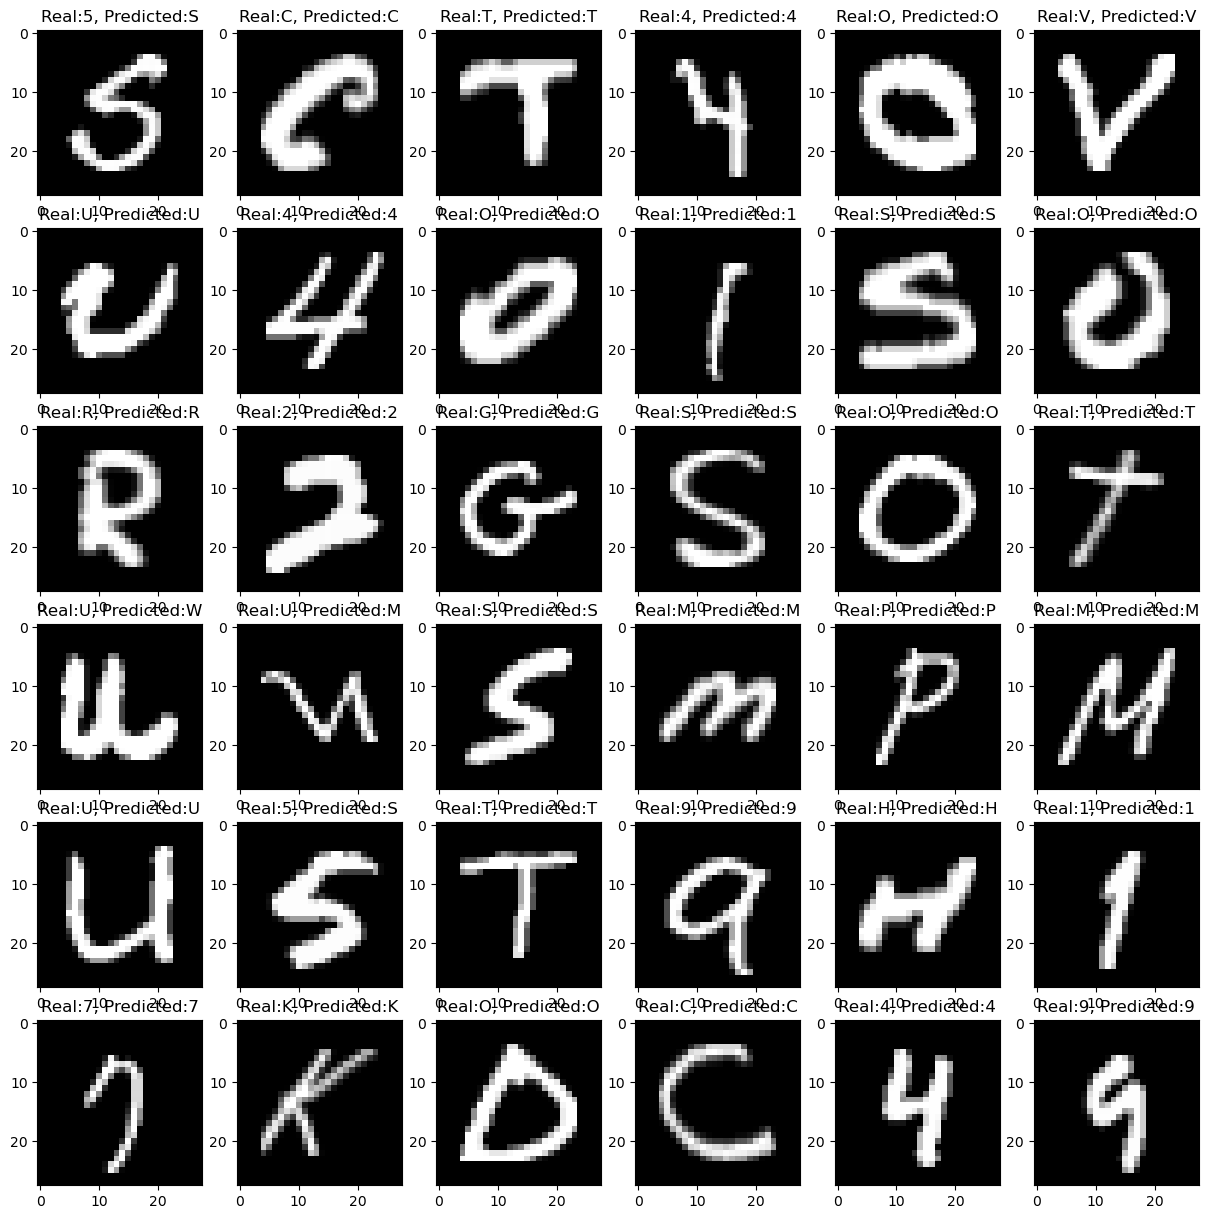

In [45]:
predictions = model.predict(x_test[:36])

plt.figure(figsize=(15,15))
for i in range(36):
    
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    y_real_label = base_36_dict[y_test[i].argmax()]
    y_predicted = base_36_dict[predictions[i].argmax()]

    plt.title(f'Real:{y_real_label}, Predicted:{y_predicted}')
plt.show()
    